# Analysis Data Structure 
#### Analysis structure of Geant4 datafile and display different properties of the beam graphically 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
import seaborn as sns

# 
#### Import data file
##### A Geant4 data file of Proton Beam with initial energy of 150 MeV 
##### "EventID"-"TrackID"

In [23]:
SimulatedData  = np.genfromtxt('/home/fardous/Desktop/Proton_Beam_Therapy/Data/ProtonBeamTherapyDataFile.csv', delimiter=',')
#SimulatedData  = np.genfromtxt('/home/fardous/Desktop/Modified_Code/Data/Proton_252.624MeV.csv', delimiter=',')

# 
### Determine Properties Of Beam at the surface of the target
#### "Energy Distribution of Different Particles" "Number of Different Particles" "Total Energy of Different Particles"

In [57]:
surface_all_particle_energy_distribution        = []
surface_proton_energy_distribution              = []
surface_neutron_energy_distribution             = []
surface_electron_energy_distribution            = []
surface_photon_energy_distribution              = []
surface_other_particle_energy_distribution      = []

surface_all_particle_energy        = 0
surface_proton_energy              = 0
surface_neutron_energy             = 0
surface_electron_energy            = 0
surface_photon_energy              = 0
surface_other_particle_energy      = 0

number_of_surface_particle         = 0
number_of_surface_proton           = 0
number_of_surface_neutron          = 0
number_of_surface_electron         = 0
number_of_surface_photon           = 0
number_of_surface_other_particle   = 0

number_of_row_datafile = np.shape(SimulatedData)[0]

for row in range(number_of_row_datafile):
    eventID               = SimulatedData[row][0]
    trackID               = SimulatedData[row][1]
    particleID            = SimulatedData[row][2]
    parentID              = SimulatedData[row][3]
    pre_X                 = SimulatedData[row][4]*1000 
    pre_Y                 = SimulatedData[row][5]*1000 
    pre_Z                 = SimulatedData[row][6]
    post_X                = SimulatedData[row][7]*1000
    post_Y                = SimulatedData[row][8]*1000
    post_Z                = SimulatedData[row][9]
    pre_Ang_X             = SimulatedData[row][10]
    pre_Ang_Y             = SimulatedData[row][11]
    pre_z_direction       = SimulatedData[row][12]
    post_Ang_X            = SimulatedData[row][13]
    post_Ang_Y            = SimulatedData[row][14]
    post_z_direction      = SimulatedData[row][15]
    energy_Deposit        = SimulatedData[row][16]
    secondery_Energy      = SimulatedData[row][17]
    pre_KE                = SimulatedData[row][18]
    post_KE               = SimulatedData[row][19]

    if(pre_Z==0):
        surface_all_particle_energy_distribution.append(pre_KE)
        number_of_surface_particle = number_of_surface_particle + 1
        surface_all_particle_energy = surface_all_particle_energy + pre_KE

        if  (particleID == 1):
            surface_proton_energy_distribution.append(pre_KE)
            number_of_surface_proton = number_of_surface_proton + 1
            surface_proton_energy = surface_proton_energy + pre_KE

        elif(particleID == 5):
            surface_neutron_energy_distribution.append(pre_KE)
            number_of_surface_neutron = number_of_surface_neutron + 1
            surface_neutron_energy = surface_neutron_energy + pre_KE

        elif(particleID == 2):
           
            surface_electron_energy_distribution.append(pre_KE)
            number_of_surface_electron = number_of_surface_electron + 1
            surface_electron_energy = surface_electron_energy + pre_KE

        elif(particleID == 3):
            surface_photon_energy_distribution.append(pre_KE)
            number_of_surface_photon = number_of_surface_photon + 1
            surface_photon_energy = surface_photon_energy + pre_KE

        else:
            surface_other_particle_energy_distribution.append(pre_KE)
            number_of_surface_other_particle = number_of_surface_other_particle + 1
            surface_other_particle_energy = surface_other_particle_energy + pre_KE      


Other
Other


# 
### Produce Graphs of Energy distribution of different particles at the surface

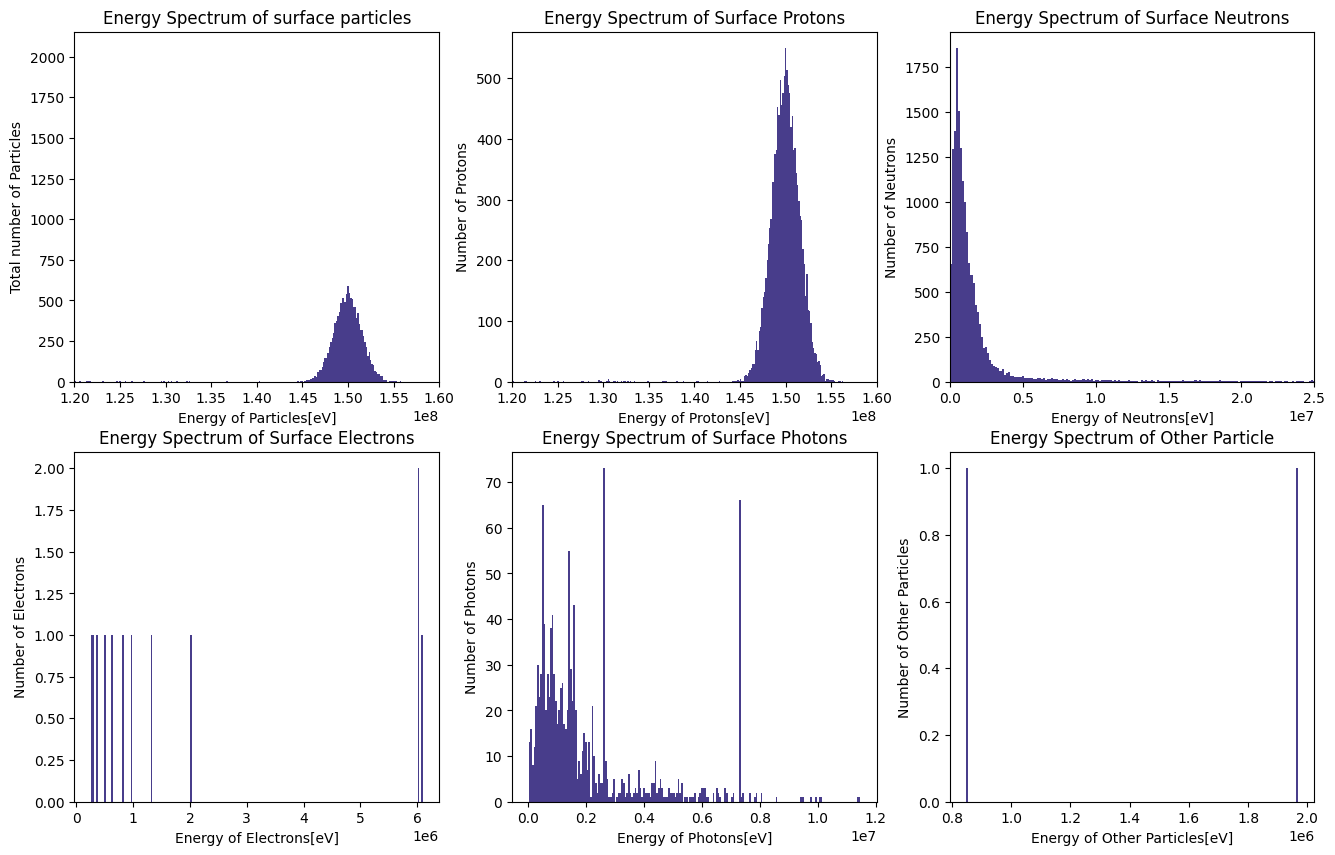

In [67]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 16, 10
plt.rcParams['axes.facecolor'] = 'white'

plt.subplot(2, 3, 1)
plt.hist(surface_all_particle_energy_distribution, bins =1000, color='darkslateblue')
plt.title('Energy Spectrum of surface particles')
plt.xlabel('Energy of Particles[eV]')
plt.ylabel('Total number of Particles')
plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 3, 2)
plt.hist(surface_proton_energy_distribution, bins =1000, color='darkslateblue')
plt.title('Energy Spectrum of Surface Protons')
plt.xlabel('Energy of Protons[eV]')
plt.ylabel('Number of Protons')
plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 3, 3)
plt.hist(surface_neutron_energy_distribution, bins =1000 , color='darkslateblue')
plt.title('Energy Spectrum of Surface Neutrons')
plt.xlabel('Energy of Neutrons[eV]')
plt.ylabel('Number of Neutrons')
plt.xlim(0, 0.25e8)

plt.subplot(2, 3, 4)
plt.hist(surface_electron_energy_distribution, bins =200 , color='darkslateblue')
plt.title('Energy Spectrum of Surface Electrons')
plt.xlabel('Energy of Electrons[eV]')
plt.ylabel('Number of Electrons')
#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 3, 5)
plt.hist(surface_photon_energy_distribution, bins =200 , color='darkslateblue')
plt.title('Energy Spectrum of Surface Photons')
plt.xlabel('Energy of Photons[eV]')
plt.ylabel('Number of Photons')
#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 3, 6)
plt.hist(surface_other_particle_energy_distribution, bins =200 , color='darkslateblue')
plt.title('Energy Spectrum of Other Particle')
plt.xlabel('Energy of Other Particles[eV]')
plt.ylabel('Number of Other Particles')
#plt.xlim(1.2e8, 1.6e8)

plt.show()

# 
### Produce Graphs of relative number of particles and their total energy at the surface 

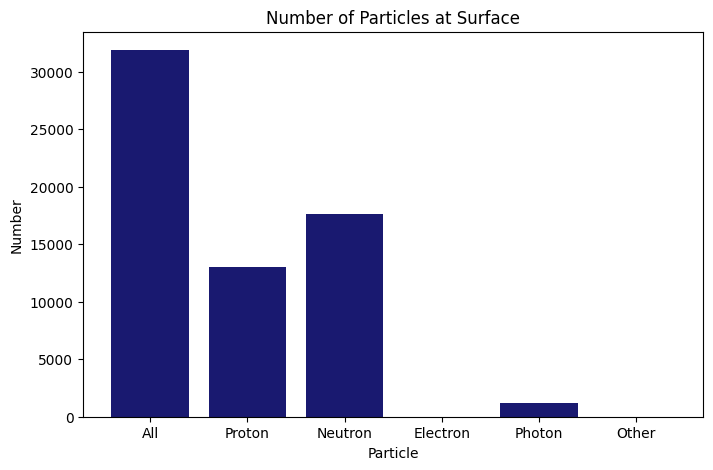

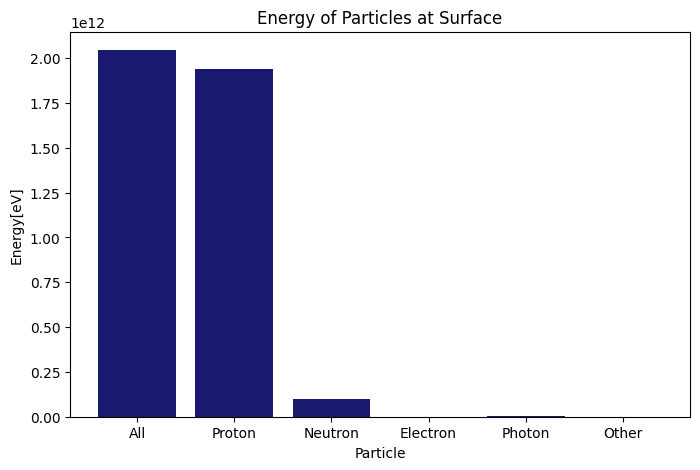

In [68]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

particle_name   = ['All', 'Proton', 'Neutron', 'Electron', 'Photon', 'Other']

surface_particle_number = [number_of_surface_particle, number_of_surface_proton, number_of_surface_neutron, number_of_surface_electron,
                           number_of_surface_photon, number_of_surface_other_particle]

surface_particle_total_energy = [surface_all_particle_energy, surface_proton_energy, surface_neutron_energy, surface_electron_energy,
                                surface_photon_energy, surface_other_particle_energy]


plt.bar(particle_name, surface_particle_number, color='midnightblue')
plt.xlabel("Particle")
plt.ylabel("Number")
plt.title("Number of Particles at Surface")
plt.show()

plt.bar(particle_name, surface_particle_total_energy, color='midnightblue')
plt.xlabel("Particle")
plt.ylabel("Energy[eV]")
plt.title("Energy of Particles at Surface")
plt.show()

# 
### Energy deposition in the target by different particle 

In [60]:

target_all_energy       = []
target_proton_energy    = []
target_neutron_energy   = []
target_electron_energy  = []
target_photon_energy    = []
target_other_energy     = []

all_x = []
all_y = []
all_z = []

proton_x = []
proton_y = []
proton_z = []

neutron_x = []
neutron_y = []
neutron_z = []

electron_x = []
electron_y = []
electron_z = []

photon_x = []
photon_y = []
photon_z = []

other_x  = []
other_y  = []
other_z  = []

number_of_row_datafile = np.shape(SimulatedData)[0]

for row in range(number_of_row_datafile):
    eventID               =SimulatedData[row][0]
    trackID               =SimulatedData[row][1]
    particleID            =SimulatedData[row][2]
    parentID              =SimulatedData[row][3]
    pre_X                 =SimulatedData[row][4]*1000 
    pre_Y                 =SimulatedData[row][5]*1000 
    pre_Z                 =SimulatedData[row][6]
    post_X                =SimulatedData[row][7]*1000
    post_Y                =SimulatedData[row][8]*1000
    post_Z                =SimulatedData[row][9]
    pre_Ang_X             =SimulatedData[row][10]
    pre_Ang_Y             =SimulatedData[row][11]
    pre_z_direction       =SimulatedData[row][12]
    post_Ang_X            =SimulatedData[row][13]
    post_Ang_Y            =SimulatedData[row][14]
    post_z_direction      =SimulatedData[row][15]
    energy_Deposit        =SimulatedData[row][16]
    secondery_Energy      =SimulatedData[row][17]
    pre_KE                =SimulatedData[row][18]
    post_KE               =SimulatedData[row][19]
    
    target_all_energy.append(energy_Deposit)
    all_x.append(random.uniform(pre_X, post_X))
    all_y.append(random.uniform(pre_Y, post_Y))
    all_z.append(random.uniform(pre_Z, post_Z))

    if(particleID == 1):
        target_proton_energy.append(energy_Deposit)
        proton_x.append(random.uniform(pre_X, post_X))
        proton_y.append(random.uniform(pre_Y, post_Y))
        proton_z.append(random.uniform(pre_Z, post_Z))

    elif(particleID == 5):
        target_neutron_energy.append(energy_Deposit)
        neutron_x.append(random.uniform(pre_X, post_X))
        neutron_y.append(random.uniform(pre_Y, post_Y))
        neutron_z.append(random.uniform(pre_Z, post_Z))

    elif(particleID == 2):
        target_electron_energy.append(energy_Deposit)
        electron_x.append(random.uniform(pre_X, post_X))
        electron_y.append(random.uniform(pre_Y, post_Y))
        electron_z.append(random.uniform(pre_Z, post_Z))

    elif(particleID == 3):
        target_photon_energy.append(energy_Deposit)
        photon_x.append(random.uniform(pre_X, post_X))
        photon_y.append(random.uniform(pre_Y, post_Y))
        photon_z.append(random.uniform(pre_Z, post_Z))
    else:
        target_other_energy.append(energy_Deposit)
        other_x.append(random.uniform(pre_X, post_X))
        other_y.append(random.uniform(pre_Y, post_Y))
        other_z.append(random.uniform(pre_Z, post_Z))
        

# Bragg Peak 

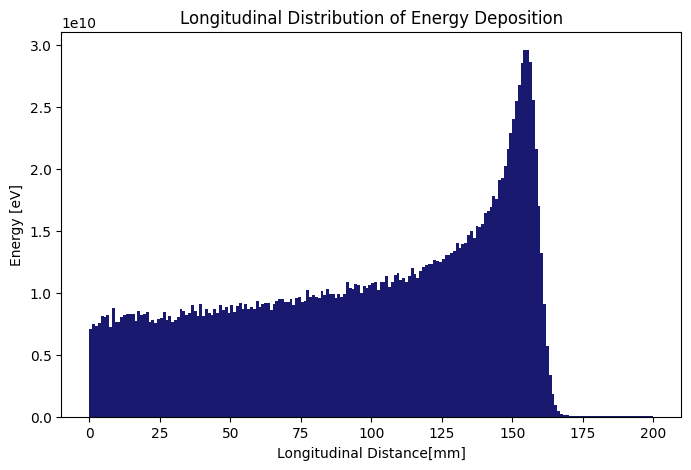

In [69]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

n, bins, patches = plt.hist(proton_z, bins=200, weights=target_proton_energy, range=[0, 200], color='midnightblue')

plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

plt.show()

In [62]:
def PositionEnergyDeposition_STP(Data, Particle, TransverseRange):
    target_energy       = []
    energy_x = []
    energy_y = []
    energy_z = []

    number_of_row_datafile = np.shape(Data)[0]

    for row in range(number_of_row_datafile):
        eventID               =SimulatedData[row][0]
        trackID               =SimulatedData[row][1]
        particleID            =SimulatedData[row][2]
        parentID              =SimulatedData[row][3]
        pre_X                 =SimulatedData[row][4]*1000 
        pre_Y                 =SimulatedData[row][5]*1000 
        pre_Z                 =SimulatedData[row][6]
        post_X                =SimulatedData[row][7]*1000
        post_Y                =SimulatedData[row][8]*1000
        post_Z                =SimulatedData[row][9]
        pre_Ang_X             =SimulatedData[row][10]
        pre_Ang_Y             =SimulatedData[row][11]
        pre_z_direction       =SimulatedData[row][12]
        post_Ang_X            =SimulatedData[row][13]
        post_Ang_Y            =SimulatedData[row][14]
        post_z_direction      =SimulatedData[row][15]
        energy_Deposit        =SimulatedData[row][16]
        secondery_Energy      =SimulatedData[row][17]
        pre_KE                =SimulatedData[row][18]
        post_KE               =SimulatedData[row][19]

        if(particleID == Particle):
            energy_dipo_point_x = random.uniform(pre_X, post_X)
            energy_dipo_point_y = random.uniform(pre_Y, post_Y)
            energy_dipo_point_z = random.uniform(pre_Z, post_Z)
            if((energy_dipo_point_x**2+energy_dipo_point_y**2)<=TransverseRange**2):
                target_energy.append(energy_Deposit)
                energy_x.append(energy_dipo_point_x)
                energy_y.append(energy_dipo_point_y)
                energy_z.append(energy_dipo_point_z)
                
    output = np.array([energy_x, energy_y, energy_z, target_energy])
    return(output.transpose())


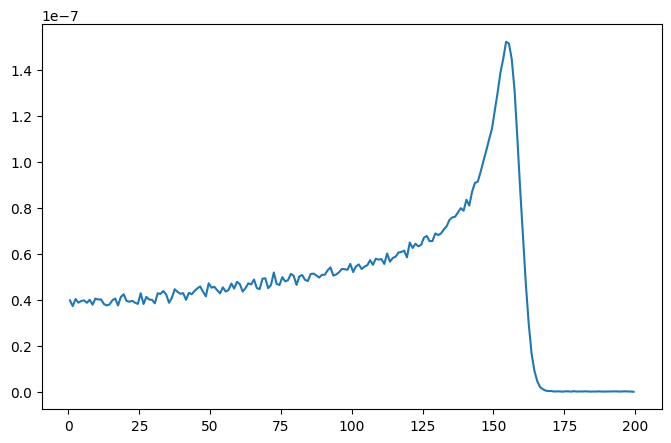

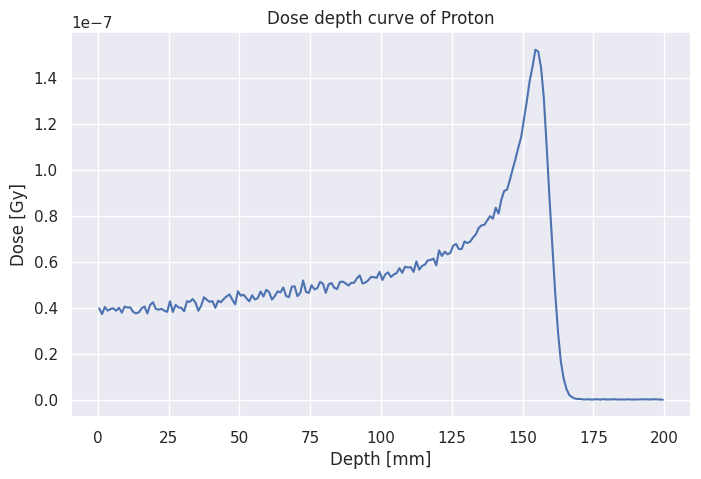

In [70]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'
radius  = 100
position_energy_diposition = PositionEnergyDeposition_STP(SimulatedData, 1, radius)
position_x = position_energy_diposition[:,0]
position_y = position_energy_diposition[:,1]
position_z = position_energy_diposition[:,2]
energy     = position_energy_diposition[:,3]

density = 997 # in kg/m3 
length  = 1   # in mm

mass = mt.pi*(radius/1000)**2*length/1000*density

 
Proton_Energy_Deposit_Histogram, Proton_Energy_Deposit_Histogram_Bin_Edges = np.histogram( position_z, bins = 200, 
                                            weights = energy, range = [0, 200])

dose = (Proton_Energy_Deposit_Histogram*1.60218e-19)/mass
plt.plot(Proton_Energy_Deposit_Histogram_Bin_Edges[:-1]+.5, dose)
plt.show()

sns.set()
sns.lineplot(Proton_Energy_Deposit_Histogram_Bin_Edges[:-1]+.5, dose)
plt.title('Dose depth curve of Proton')
plt.xlabel('Depth [mm]')
plt.ylabel('Dose [Gy]')
plt.show()

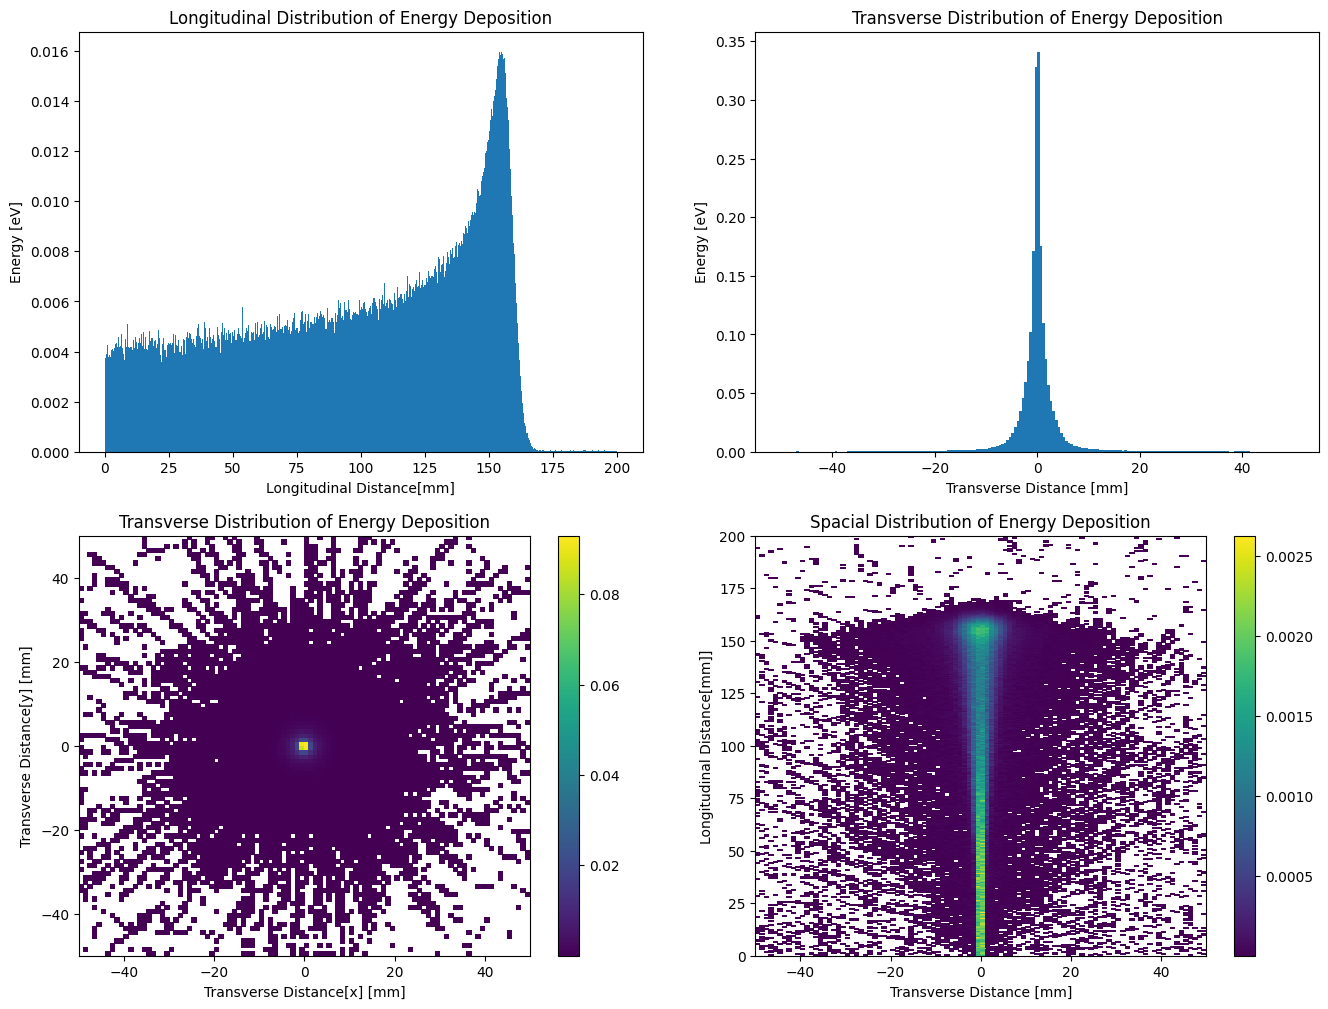

In [71]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(proton_z, bins=510, weights=target_proton_energy, range=[0, 200], density =1,)
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(proton_x, bins=200, weights=target_proton_energy, range=[-50, 50], density =1,)
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(proton_x, proton_y, bins=[100,100], weights=target_proton_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50,50],[-50,50]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[y] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(proton_x, proton_z, bins=[100,400], weights=target_proton_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50,50], [0, 200]])
plt.title('Spacial Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.colorbar()
plt.savefig('150MeV_Proton_Energy_Distribution.png', dpi=400)
plt.show()

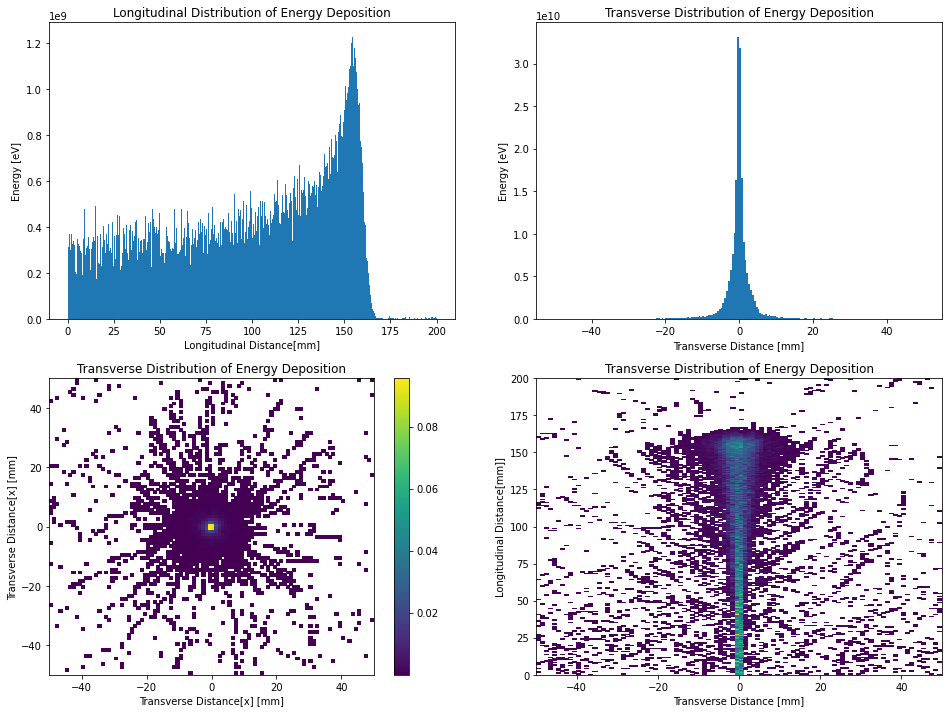

In [49]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(all_z, bins=510, weights=target_all_energy, range=[0,200])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(all_x, bins=200, weights=target_all_energy, range=[-50, 50])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(all_x, all_y, bins=[100,100], weights=target_all_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50, 50],[-50, 50]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(all_x, all_z, bins=[100,400], weights=target_all_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50, 50], [0,200]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

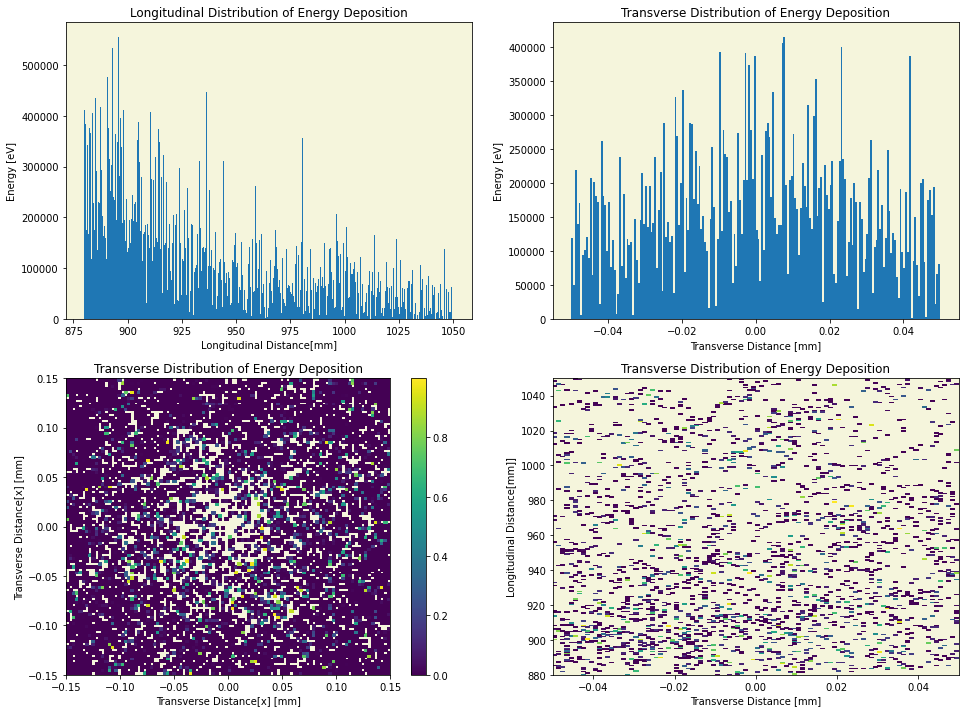

In [50]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(neutron_z, bins=510, weights=target_neutron_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(neutron_x, bins=200, weights=target_neutron_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(neutron_x, neutron_y, bins=[100,100], weights=target_neutron_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(neutron_x, neutron_z, bins=[100,400], weights=target_neutron_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

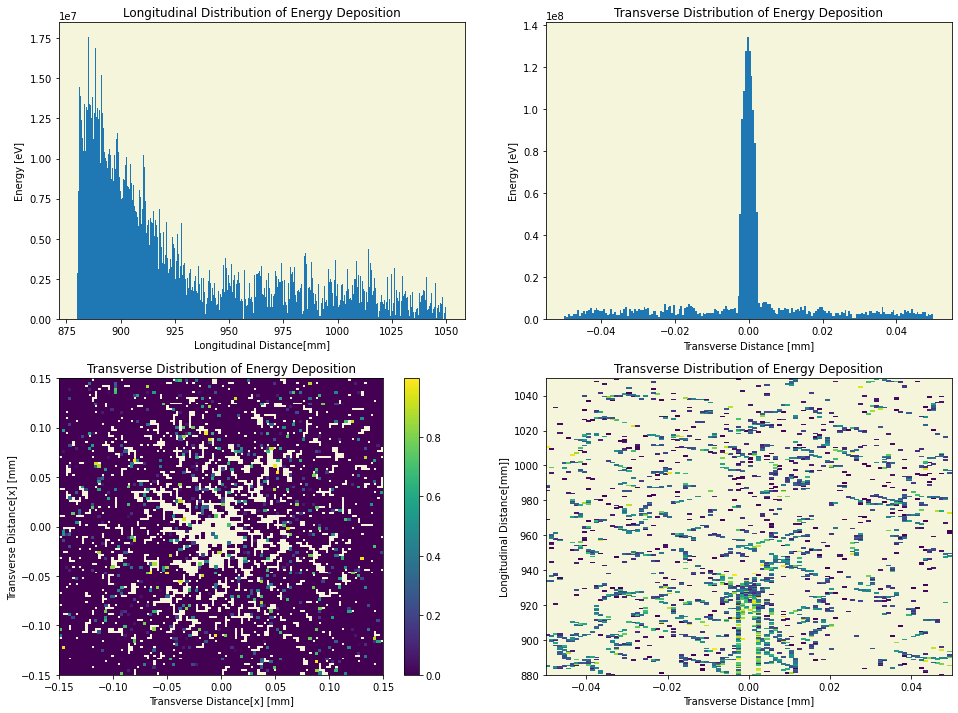

In [51]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(electron_z, bins=510, weights=target_electron_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(electron_x, bins=200, weights=target_electron_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(electron_x, electron_y, bins=[100,100], weights=target_electron_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(electron_x, electron_z, bins=[100,400], weights=target_electron_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

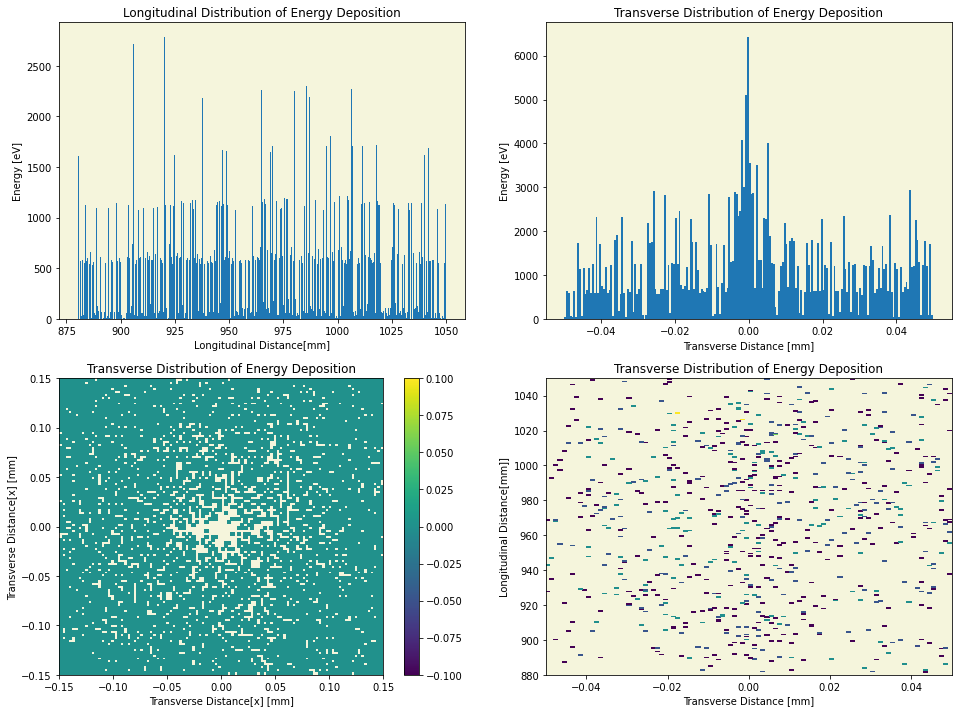

In [54]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(photon_z, bins=510, weights=target_photon_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(photon_x, bins=200, weights=target_photon_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(photon_x, photon_y, bins=[100,100], weights=target_photon_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(photon_x, photon_z, bins=[100,400], weights=target_photon_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()